In [1]:
from tomoSegmentPipeline import dataloader as dl
from tomoSegmentPipeline.utils import setup
from tomoSegmentPipeline.dataloader import to_categorical, transpose_to_channels_first, tomoSegment_dummyDataset, tomoSegment_dataset
from tomoSegmentPipeline.trainWrapper import make_trainer

import os

PARENT_PATH = setup.PARENT_PATH

import torch

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

train_tomos = ['tomo02', 'tomo03', 'tomo17']
concat_train_ids = sorted([s.replace('tomo', '') for s in train_tomos])
concat_train_ids = '-'.join(concat_train_ids)

val_tomos = ['tomo32', 'tomo10']
concat_val_ids = sorted([s.replace('tomo', '') for s in val_tomos])
concat_val_ids = '-'.join(concat_val_ids)

test_tomos = ['tomo38', 'tomo04']
concat_test_ids = sorted([s.replace('tomo', '') for s in test_tomos])
concat_test_ids = '-'.join(concat_test_ids)

paths_trainData, paths_trainTarget = setup.get_paths(train_tomos, 'cryoCARE')
paths_valData, paths_valTarget = setup.get_paths(val_tomos, 'cryoCARE')

# Profiling

In [10]:
tb_logdir = os.path.join(PARENT_PATH, 'models_scratchpad/logs/BenchmarkBaselineModel/train%s' %concat_train_ids)

trainer = make_trainer(dim_in=56, batch_size=32, lr=1e-4, epochs=10, tb_logdir=tb_logdir, model_name='3.02_BaselineBenchmark',
                       reconstruction_trainer=False, pretrained_model=None, test_run=False)

In [11]:
trainer.launch(paths_trainData, paths_trainTarget, paths_valData, paths_valTarget)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Set SLURM handle signals.

  | Name    | Type         | Params
-----------------------------------------
0 | loss_fn | Tversky_loss | 0     
1 | layer1  | Sequential   | 28.6 K
2 | layer2  | Sequential   | 103 K 
3 | layer3  | Sequential   | 558 K 
4 | layer4  | Sequential   | 288 K 
5 | layer5  | Sequential   | 96.9 K
-----------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.304     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

"Ncl":           2
"loss_fn":       Tversky_loss()
"lr":            0.0001
"pretrain_type": None
"weight_decay":  0.0


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

FIT Profiler Report

Action                             	|  Mean duration (s)	|Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------
Total                              	|  -              	|_              	|  1568.1         	|  100 %          	|
--------------------------------------------------------------------------------------------------------------------------------------
run_training_epoch                 	|  155.3          	|10             	|  1553.0         	|  99.039         	|
run_training_batch                 	|  1.262          	|640            	|  807.67         	|  51.508         	|
get_train_batch                    	|  0.73914        	|640            	|  473.05         	|  30.168         	|
optimizer_step_and_closure_0       	|  0.066802       	|640            	|  42.753         	|  2.7265         	|
training_step_and_backward         

Saving model at:  /home/haicu/jeronimo.carvajal/Thesis/models_scratchpad/logs/BenchmarkBaselineModel/train02-03-17/version_0/3.02_BaselineBenchmark_ep10_in56_lr0.000100_0.model

Writing to modelSummary...
Opening ModelSummary file...
ModelSummary file exists, appending current model data...


In [12]:
tb_logdir = os.path.join(PARENT_PATH, 'models_scratchpad/logs/BenchmarkBaselineModel/train%s' %concat_train_ids)

trainer = make_trainer(dim_in=56, batch_size=1, lr=1e-4, epochs=10, tb_logdir=tb_logdir, model_name='3.02_BaselineBenchmark',
                       reconstruction_trainer=False, pretrained_model=None, test_run=False)

trainer.launch(paths_trainData, paths_trainTarget, paths_valData, paths_valTarget)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Set SLURM handle signals.

  | Name    | Type         | Params
-----------------------------------------
0 | loss_fn | Tversky_loss | 0     
1 | layer1  | Sequential   | 28.6 K
2 | layer2  | Sequential   | 103 K 
3 | layer3  | Sequential   | 558 K 
4 | layer4  | Sequential   | 288 K 
5 | layer5  | Sequential   | 96.9 K
-----------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.304     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

"Ncl":           2
"loss_fn":       Tversky_loss()
"lr":            0.0001
"pretrain_type": None
"weight_decay":  0.0
Saving model at:  /home/haicu/jeronimo.carvajal/Thesis/models_scratchpad/logs/BenchmarkBaselineModel/train02-03-17/version_1/3.02_BaselineBenchmark_ep10_in56_lr0.000100_1.model

Writing to modelSummary...


IndexError: list index out of range

In [13]:
tb_logdir = os.path.join(PARENT_PATH, 'models_scratchpad/logs/BenchmarkBaselineModel/train%s' %concat_train_ids)

trainer = make_trainer(dim_in=56, batch_size=32, lr=1e-4, epochs=10, tb_logdir=tb_logdir, model_name='3.02_BaselineBenchmark',
                       reconstruction_trainer=False, pretrained_model=None, test_run=False)

trainer.launch(paths_trainData, paths_trainTarget, paths_valData, paths_valTarget)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Set SLURM handle signals.

  | Name    | Type         | Params
-----------------------------------------
0 | loss_fn | Tversky_loss | 0     
1 | layer1  | Sequential   | 28.6 K
2 | layer2  | Sequential   | 103 K 
3 | layer3  | Sequential   | 558 K 
4 | layer4  | Sequential   | 288 K 
5 | layer5  | Sequential   | 96.9 K
-----------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.304     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

"Ncl":           2
"loss_fn":       Tversky_loss()
"lr":            0.0001
"pretrain_type": None
"weight_decay":  0.0


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

FIT Profiler Report

Action                             	|  Mean duration (s)	|Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------
Total                              	|  -              	|_              	|  1106.3         	|  100 %          	|
--------------------------------------------------------------------------------------------------------------------------------------
run_training_epoch                 	|  110.07         	|10             	|  1100.7         	|  99.488         	|
run_training_batch                 	|  1.2703         	|640            	|  812.96         	|  73.484         	|
optimizer_step_and_closure_0       	|  0.057802       	|640            	|  36.994         	|  3.3438         	|
training_step_and_backward         	|  0.052695       	|640            	|  33.725         	|  3.0484         	|
get_train_batch                    

Saving model at:  /home/haicu/jeronimo.carvajal/Thesis/models_scratchpad/logs/BenchmarkBaselineModel/train02-03-17/version_2/3.02_BaselineBenchmark_ep10_in56_lr0.000100_2.model

Writing to modelSummary...
Opening ModelSummary file...
ModelSummary file exists, appending current model data...


In [ ]:
tb_logdir = os.path.join(PARENT_PATH, 'models_scratchpad/logs/BenchmarkBaselineModel/train%s' %concat_train_ids)

trainer = make_trainer(dim_in=84, batch_size=4, lr=1e-4, epochs=10, tb_logdir=tb_logdir, model_name='3.02_BaselineBenchmark',
                       reconstruction_trainer=False, pretrained_model=None, test_run=False)

trainer.launch(paths_trainData, paths_trainTarget, paths_valData, paths_valTarget)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Set SLURM handle signals.

  | Name    | Type         | Params
-----------------------------------------
0 | loss_fn | Tversky_loss | 0     
1 | layer1  | Sequential   | 28.6 K
2 | layer2  | Sequential   | 103 K 
3 | layer3  | Sequential   | 558 K 
4 | layer4  | Sequential   | 288 K 
5 | layer5  | Sequential   | 96.9 K
-----------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.304     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

"Ncl":           2
"loss_fn":       Tversky_loss()
"lr":            0.0001
"pretrain_type": None
"weight_decay":  0.0


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

# Dataloader

In [5]:
class tomoSegment_dataset(dl.Dataset):
    def __init__(self, path_data, path_target, dim_in,
                 Ncl, Lrnd, augment_data):
        
        self.path_data = path_data
        self.path_target = path_target
        self.dim_in = dim_in
        self.Ncl = Ncl
        self.p_in = np.int(np.floor(self.dim_in / 2))
        self.Lrnd = Lrnd
        self.augment_data = augment_data

        self.data_list, self.target_list = core.load_dataset(self.path_data, self.path_target, '')

        self.Ncl_labels = int(max([max(np.unique(l)) for l in self.target_list]))+1
        
        self.tomo_shape = self.data_list[0].shape
        
        self.grid = self.create_grid()

    def __len__(self):
        return len(self.grid)*len(self.data_list)

    def __getitem__(self, idx):
        return self.create_batch(idx)

    def data_augmentation(self, batch_data, batch_target):

        # 180degree rotation around Y axis
        if np.random.uniform() < 0.5:
            # print('Shifting Y...')
            batch_data = torch.rot90(batch_data, k=2, dims=(0, 2))
            batch_target = torch.rot90(batch_target, k=2, dims=(0, 2))
        # 180degree rotation around X axis
        if np.random.uniform() < 0.5:
            # print('Shifting X...')
            batch_data = torch.rot90(batch_data, k=2, dims=(0, 1))
            batch_target = torch.rot90(batch_target, k=2, dims=(0, 1))
        # rotation between 90 and 270 around Z axis   
        if np.random.uniform() < 0.5:
            k = int(np.random.choice([1, 2, 3]))
            # print('Shifting Z...', k)
            batch_data = torch.rot90(batch_data, k=k, dims=(1, 2))
            batch_target = torch.rot90(batch_target, k=k, dims=(1, 2))
            
        return batch_data, batch_target


    def shift_coords(self, z, y, x, tomodim):
        # Add random shift to coordinates:
        x = x + np.random.choice(range(-self.Lrnd, self.Lrnd+1))
        y = y + np.random.choice(range(-self.Lrnd, self.Lrnd+1))
        z = z + np.random.choice(range(-self.Lrnd, self.Lrnd+1))
        
        # Shift position if too close to border:
        if (x<self.p_in) : x = self.p_in
        if (y<self.p_in) : y = self.p_in
        if (z<self.p_in) : z = self.p_in
        if (x>tomodim[2]-self.p_in): x = tomodim[2]-self.p_in
        if (y>tomodim[1]-self.p_in): y = tomodim[1]-self.p_in
        if (z>tomodim[0]-self.p_in): z = tomodim[0]-self.p_in
        
        return x, y, z
    
    
    def create_grid(self):
        
        # I got this number from inspecting a couple of the label files
        noise_margin = 15
        
        centers = []
        for c in self.tomo_shape:
            centers.append(np.arange(max(noise_margin+self.p_in//2, self.p_in),
                                min(c-noise_margin-self.p_in//2 + 1, c-self.p_in+1),
                                self.p_in))
        
        zs, ys, xs = np.meshgrid(*centers, indexing='ij')
        grid = list(zip(zs.flatten(), ys.flatten(), xs.flatten()))
        
        return grid

    def create_batch(self, index):
        """
        Generates batches for training and validation. In this version, the whole dataset has already been loaded into
        memory, and batch is sampled from there.
        INPUTS:
          index: 
        OUTPUT:
          batch_data: numpy array [batch_idx, channel, z, y, x] in our case only 1 channel
          batch_target: numpy array [batch_idx, class_idx, z, y, x] is one-hot encoded
        """
        
        batch_data = np.zeros((self.dim_in, self.dim_in, self.dim_in, 1))
        
        inputID = index//len(self.grid)

        sample_data = self.data_list[inputID]
        sample_target = self.target_list[inputID]

        # Get patch position:
        z, y, x = self.grid[index%len(self.grid)]
        z, y, x = self.shift_coords(z, y, x, sample_data.shape)

        # Get patch:
        patch_data = sample_data[z - self.p_in:z + self.p_in, y - self.p_in:y + self.p_in, x - self.p_in:x + self.p_in]
        patch_target = sample_target[z - self.p_in:z + self.p_in, y - self.p_in:y + self.p_in, x - self.p_in:x + self.p_in]

        # Process the patches in order to be used by network:
        # print(patch_data)
        patch_data = (patch_data - torch.mean(patch_data)) / torch.std(patch_data)  # normalize
        patch_target_onehot = to_categorical(patch_target, self.Ncl_labels)

        # Store into batch array:
        batch_data[:, :, :, 0] = patch_data
        batch_target = patch_target_onehot # shape is Z, Y, X, Ncl

        batch_data = torch.tensor(batch_data)
        batch_target = torch.tensor(batch_target)
        
        ############## Data augmentation #############################
        if self.augment_data:
            batch_data, batch_target = self.data_augmentation(batch_data, batch_target)

        batch_data = transpose_to_channels_first(batch_data).to(torch.float)
        batch_target = transpose_to_channels_first(batch_target).to(torch.float)

        return batch_data, batch_target

In [ ]:
path

In [2]:
dim_in = 84
Lrnd = 5

my_dataset = dl.tomoSegment_dataset(paths_trainData, paths_trainTarget, dim_in, Ncl=2, Lrnd=Lrnd, augment_data=False)
# my_dataset = dl.tomoSegment_dummyDataset(path_data, path_target, dim_in, Ncl=2)
len(my_dataset)

256

In [6]:
dim_in = 56
Lrnd = 5

my_dataset = dl.tomoSegment_dataset(paths_trainData, paths_trainTarget, dim_in, Ncl=2, Lrnd=Lrnd, augment_data=False)
# my_dataset = dl.tomoSegment_dummyDataset(path_data, path_target, dim_in, Ncl=2)
len(my_dataset)

2048

In [3]:
dim_in = 64
Lrnd = 5

my_dataset = dl.tomoSegment_dataset(paths_valData, paths_valTarget, dim_in, Ncl=2, Lrnd=Lrnd, augment_data=False)
# my_dataset = dl.tomoSegment_dummyDataset(path_data, path_target, dim_in, Ncl=2)
len(my_dataset)

1216

In [7]:
dim_in = 72
Lrnd = 5

my_dataset = dl.tomoSegment_dataset(paths_trainData, paths_trainTarget, dim_in, Ncl=2, Lrnd=Lrnd, augment_data=False)
# my_dataset = dl.tomoSegment_dummyDataset(path_data, path_target, dim_in, Ncl=2)
len(my_dataset)

864

In [77]:
dataset = dl.tomoSegment_dummyDataset
dataset(path_data, path_target, dim_in, Ncl=2)

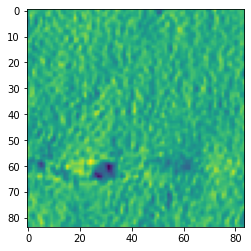

In [8]:
batch_data, batch_target = my_dataset[0]
plt.imshow(batch_data.squeeze()[dim_in//2])